In [1]:
# Math and data management
import numpy as np
import pandas as pd
import json

# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn visual style
sns.set()
sns.set_context('talk')
plt.rcParams["patch.force_edgecolor"] = False  # Turn off histogram borders

In [2]:
ALB_CR = pd.read_sas('NHANES/P_ALB_CR.XPT')[['SEQN', 'URXUCR']]
ALQ = pd.read_sas('NHANES/P_ALQ.XPT')[['SEQN', 'ALQ130']]
BMX = pd.read_sas('NHANES/P_BMX.XPT')[['SEQN', 'BMXBMI']]
BPXO = pd.read_sas('NHANES/P_BPXO.XPT')[['SEQN', 'BPXOSY1', 'BPXODI1']]
CBC = pd.read_sas('NHANES/P_CBC.XPT')[['SEQN', 'LBXWBCSI', 'LBXHGB']]
CDQ = pd.read_sas('NHANES/P_CDQ.XPT')[['SEQN', 'CDQ001', 'CDQ008']]
DEMO = pd.read_sas('NHANES/P_DEMO.XPT')[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3']]
DIQ = pd.read_sas('NHANES/P_DIQ.XPT')[['SEQN', 'DID040']]
GHB = pd.read_sas('NHANES/P_GHB.XPT')[['SEQN', 'LBXGH']]
GLU = pd.read_sas('NHANES/P_GLU.XPT')[['SEQN', 'LBXGLU']]
HDL = pd.read_sas('NHANES/P_HDL.XPT')[['SEQN', 'LBDHDD']]
MCQ = pd.read_sas('NHANES/P_MCQ.XPT')[['SEQN', 'MCQ160C', 'MCQ160D', 'MCQ160E']]
SMQ = pd.read_sas('NHANES/P_SMQ.XPT')[['SEQN', 'SMQ020']]
TRIGLY = pd.read_sas('NHANES/P_TRIGLY.XPT')[['SEQN', 'LBDLDL', 'LBXTR']]


In [3]:
data = ALB_CR
data = pd.merge(data, ALQ, how='outer', on='SEQN')
data = pd.merge(data, BMX, how='outer', on='SEQN')
data = pd.merge(data, BPXO, how='outer', on='SEQN')
data = pd.merge(data, CBC, how='outer', on='SEQN')
data = pd.merge(data, CDQ, how='outer', on='SEQN')
data = pd.merge(data, DEMO, how='outer', on='SEQN')
data = pd.merge(data, DIQ, how='outer', on='SEQN')
data = pd.merge(data, GHB, how='outer', on='SEQN')
data = pd.merge(data, GLU, how='outer', on='SEQN')
data = pd.merge(data, HDL, how='outer', on='SEQN')
data = pd.merge(data, MCQ, how='outer', on='SEQN')
data = pd.merge(data, SMQ, how='outer', on='SEQN')
data = pd.merge(data, TRIGLY, how='outer', on='SEQN')

# data = data.rename(columns={
#     'URXUCR': "Creat"
# })

display(data)

,SEQN,URXUCR,ALQ130,BMXBMI,BPXOSY1,BPXODI1,LBXWBCSI,LBXHGB,CDQ001,CDQ008,...,DID040,LBXGH,LBXGLU,LBDHDD,MCQ160C,MCQ160D,MCQ160E,SMQ020,LBDLDL,LBXTR
0,109264.0,NaN,NaN,17.6,109.0,67.0,4.5,13.7,NaN,NaN,...,NaN,5.3,97.0,72.0,NaN,NaN,NaN,NaN,86.0,40.0
1,109266.0,36.0,1.0,37.8,99.0,56.0,7.8,12.3,NaN,NaN,...,NaN,5.2,NaN,56.0,2.0,2.0,2.0,2.0,NaN,NaN
2,109270.0,165.0,NaN,30.9,123.0,73.0,7.6,12.0,NaN,NaN,...,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN
3,109271.0,32.0,NaN,29.7,102.0,65.0,5.5,15.3,1.0,2.0,...,NaN,5.6,103.0,33.0,2.0,2.0,2.0,1.0,97.0,84.0
4,109273.0,121.0,NaN,21.9,116.0,68.0,6.2,15.9,NaN,NaN,...,NaN,5.1,NaN,42.0,2.0,2.0,2.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN
15556,124751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN
15557,124760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,NaN
15558,124795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We included the columns of Creatinine, HbA1c, Fasting Glucose, Blood Pressure (systole), Blood Pressuure (diastole), Smoking, HDL, LDL, Triglycerides, BMI, Alcohol, Age

In [4]:
train_test = data[
    ['URXUCR', 'LBXGH', 'LBXGLU',
    'SMQ020', 'LBDHDD', 'LBDLDL', 'LBXTR', 'BMXBMI',
    'RIDAGEYR', 'MCQ160C', 'MCQ160D'
    ]].dropna()



train_test = train_test[train_test['URXUCR'] < 740]
train_test = train_test[train_test['LBXGH'] < 17]
train_test = train_test[train_test['LBXGLU'] < 525]
# train_test = train_test[train_test['BPXOSY1'] < 256]
# train_test = train_test[train_test['BPXODI1'] < 152]
train_test = train_test[train_test['SMQ020'] < 3]
train_test = train_test[train_test['LBDHDD'] < 190]
train_test = train_test[train_test['LBDLDL'] < 358]
train_test = train_test[train_test['LBXTR'] < 2685]
train_test = train_test[train_test['BMXBMI'] < 93]
train_test = train_test[train_test['RIDAGEYR'] < 81]
train_test = train_test[train_test['MCQ160C'] < 3]
train_test = train_test[train_test['MCQ160D'] < 3]
# train_test = train_test[train_test['MCQ160E'] < 3]
# train_test = train_test[train_test['CDQ008'] < 3]

train_test = pd.get_dummies(train_test, columns=['SMQ020'])

columns = ['URXUCR', 'LBXGH', 'LBXGLU',
    'SMQ020_1.0','SMQ020_2.0',  'LBDHDD', 'LBDLDL', 'LBXTR', 'BMXBMI',
    'RIDAGEYR']

In [5]:
# Split the training data into features and target labels.
features = train_test[
    ['URXUCR', 'LBXGH', 'LBXGLU',
    'SMQ020_1.0','SMQ020_2.0',  'LBDHDD', 'LBDLDL', 'LBXTR', 'BMXBMI',
    'RIDAGEYR']]
labels = (train_test['MCQ160C'] == 1) | (train_test['MCQ160D'] == 1)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1/3))

In [6]:
# Normalizing the columns through min-max
for column in X_train.columns: 
    minimum = X_train[column].min()
    maximum = X_train[column].max()
    X_train[column] = (X_train[column] - minimum) / (maximum - minimum)     


In [7]:
alphas = np.logspace(-1, 3, num=1000)

train_score = []
train_precision = []
train_recall = []
train_f1 = []

val_score = []
val_precision = []
val_recall = []
val_f1 = []

coeffs = []

for alpha in alphas:
    l = RidgeClassifier(alpha=alpha)
    l.fit(X_train, y_train)
    coeffs.append(l.coef_[0])
    
    train_pred = l.predict(X_train)
    val_pred = l.predict(X_val)
    
    train_score.append(l.score(X_train, y_train))
    train_precision.append(precision_score(y_train, train_pred, zero_division=0))
    train_recall.append(recall_score(y_train, train_pred, zero_division=0))
    train_f1.append(f1_score(y_train, train_pred, zero_division=0))
    
    val_score.append(l.score(X_val, y_val))
    val_precision.append(precision_score(y_val, val_pred, zero_division=0))
    val_recall.append(recall_score(y_val, val_pred, zero_division=0))
    val_f1.append(f1_score(y_val, val_pred, zero_division=0))

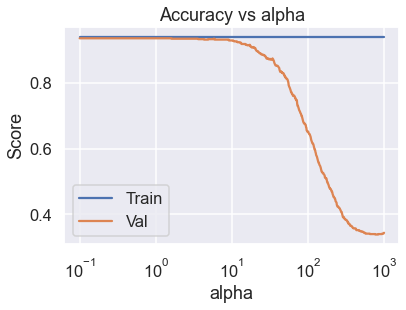

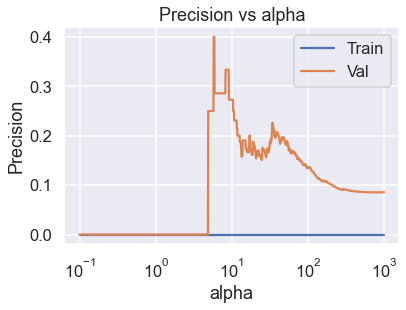

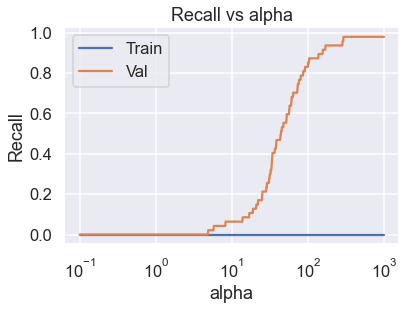

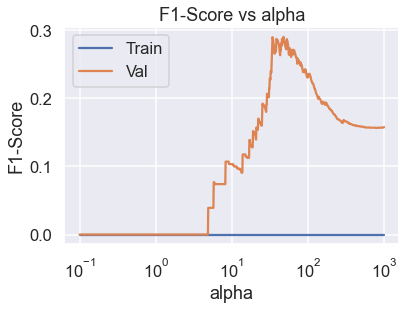

In [8]:
# plt.figure(4, figsize=(15,15))
# plt.suptitle("Logistic Regression Metrics")
# plt.subplot(221)
plt.plot(alphas, train_score)
plt.plot(alphas, val_score)
plt.xscale(value='log')
plt.legend(('Train', 'Val'))
plt.xlabel('alpha')
plt.ylabel("Score")
plt.title('Accuracy vs alpha')
plt.show()


# plt.subplot(222)
plt.plot(alphas, train_precision)
plt.plot(alphas, val_precision)
plt.xscale(value='log')
plt.legend(('Train', 'Val'))
plt.xlabel('alpha')
plt.ylabel("Precision")
plt.title('Precision vs alpha')
plt.show()

# plt.subplot(223)
plt.plot(alphas, train_recall)
plt.plot(alphas, val_recall)
plt.xscale(value='log')
plt.legend(('Train', 'Val'))
plt.xlabel('alpha')
plt.ylabel("Recall")
plt.title('Recall vs alpha')
plt.show()

# plt.subplot(224)
plt.plot(alphas, train_f1)
plt.plot(alphas, val_f1)
plt.xscale(value='log')
plt.legend(('Train', 'Val'))
plt.xlabel('alpha')
plt.ylabel("F1-Score")
plt.title('F1-Score vs alpha')
plt.show()



Coeffs Plot

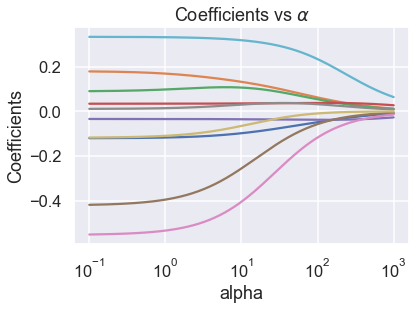

In [9]:
plt.plot(alphas, coeffs)
plt.xscale(value='log')
plt.xlabel('alpha')
plt.ylabel("Coefficients")
plt.title(r"Coefficients vs $\alpha$")
plt.show()

In [10]:
best_alpha = 10**(1.5)

model = RidgeClassifier(alpha=best_alpha).fit(X_train, y_train)
test_predictions = model.predict(X_test)
print(model.score(X_test, y_test))
print(classification_report(y_test, test_predictions, zero_division=0))


0.8826666666666667
              precision    recall  f1-score   support

       False       0.96      0.91      0.94       357
        True       0.16      0.33      0.21        18

    accuracy                           0.88       375
   macro avg       0.56      0.62      0.58       375
weighted avg       0.93      0.88      0.90       375



Random Forest

In [27]:
trees = range(100, 1000, 100)

train_score = []
train_precision = []
train_recall = []
train_f1 = []

val_score = []
val_precision = []
val_recall = []
val_f1 = []

for num in trees:
    dt = RandomForestClassifier(n_estimators=num)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    val_pred = dt.predict(X_val)
    
    train_score.append(dt.score(X_train, y_train))
    train_precision.append(precision_score(y_train, train_pred,zero_division=0))
    train_recall.append(recall_score(y_train, train_pred,zero_division=0))
    train_f1.append(f1_score(y_train, train_pred,zero_division=0))
    
    val_score.append(dt.score(X_val, y_val))
    val_precision.append(precision_score(y_val, val_pred,zero_division=0))
    val_recall.append(recall_score(y_val, val_pred,zero_division=0))
    val_f1.append(f1_score(y_val, val_pred,zero_division=0))

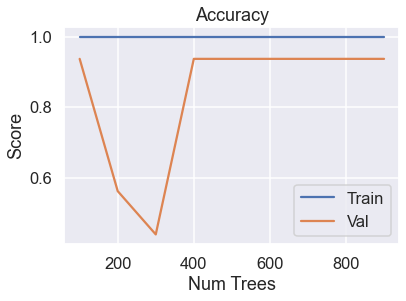

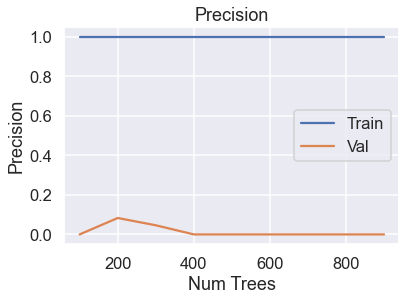

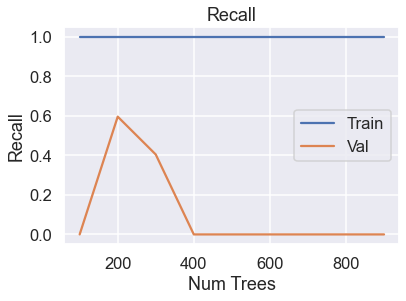

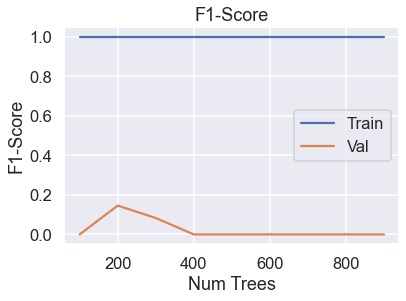

In [28]:
# plt.figure(4, figsize=(15,15))
# plt.suptitle("Decision Tree Metrics")
# plt.subplot(221)
plt.plot(trees, train_score)
plt.plot(trees, val_score)
plt.legend(('Train', 'Val'))
plt.xlabel('Num Trees')
plt.ylabel("Score")
plt.title('Accuracy')
plt.show()

# plt.subplot(222)
plt.plot(trees, train_precision)
plt.plot(trees, val_precision)
plt.legend(('Train', 'Val'))
plt.xlabel('Num Trees')
plt.ylabel("Precision")
plt.title('Precision')
plt.show()

# plt.subplot(223)
plt.plot(trees, train_recall)
plt.plot(trees, val_recall)
plt.legend(('Train', 'Val'))
plt.xlabel('Num Trees')
plt.ylabel("Recall")
plt.title('Recall')
plt.show()

# plt.subplot(224)
plt.plot(trees, train_f1)
plt.plot(trees, val_f1)
plt.legend(('Train', 'Val'))
plt.xlabel('Num Trees')
plt.ylabel("F1-Score")
plt.title('F1-Score')

plt.show()



In [43]:
best_dt = RandomForestClassifier(n_estimators=200)
best_dt.fit(X_train, y_train)
test_predictions = best_dt.predict(X_test)
print(best_dt.score(X_test, y_test))
print(classification_report(y_test, test_predictions, zero_division=0))

0.45866666666666667
              precision    recall  f1-score   support

       False       0.93      0.46      0.62       357
        True       0.03      0.33      0.06        18

    accuracy                           0.46       375
   macro avg       0.48      0.40      0.34       375
weighted avg       0.89      0.46      0.59       375



In [14]:
table = [
   [ np.sum( (train_test['LBDHDD'] < 60) & 
            ((train_test['MCQ160C'] == 1) | (train_test['MCQ160D'] == 1))), 
    np.sum( (train_test['LBDHDD'] < 60) & 
           ((train_test['MCQ160C'] == 2) & (train_test['MCQ160D'] == 2))) ],
   [ np.sum( (train_test['LBDHDD'] >= 60) & 
            ((train_test['MCQ160C'] == 1) | (train_test['MCQ160D'] == 1))), 
    np.sum( (train_test['LBDHDD'] >= 60) & 
           ((train_test['MCQ160C'] == 2) & (train_test['MCQ160D'] == 2))) ]
]

print(table)
print()

a = table[0][0]
b = table[0][1]
c = table[1][0]
d = table[1][1]

print("Odds Ratio:", (a * d) / (b * c))
print("Relative Risk:", (a/(a+b)) / (c/(c+d)))


[[170, 2447], [48, 1076]]

Odds Ratio: 1.5573491349952322
Relative Risk: 1.5211438033371543


<table>
<thead>
  <tr>
    <th></th>
    <th>CAD</th>
    <th>Not CAD</th>
  </tr>
</thead>
<tbody>
  <tr>
    <th>HDL < 60</th>
    <td>170</td>
    <td>2447</td>
  </tr>
  <tr>
    <th>HDL >= 60</th>
    <td>48</td>
    <td>1097</td>
  </tr>
</tbody>
</table>


In [15]:
table = [
   [ np.sum( (train_test['SMQ020_1.0'] == 1) & 
            ((train_test['MCQ160C'] == 1) | (train_test['MCQ160D'] == 1))), 
    np.sum( (train_test['SMQ020_1.0'] == 1) & 
           ((train_test['MCQ160C'] == 2) & (train_test['MCQ160D'] == 2))) ],
   [ np.sum( (train_test['SMQ020_2.0'] == 1) & 
            ((train_test['MCQ160C'] == 1) | (train_test['MCQ160D'] == 1))), 
    np.sum( (train_test['SMQ020_2.0'] == 1) & 
           ((train_test['MCQ160C'] == 2) & (train_test['MCQ160D'] == 2))) ]
]

print(table)
print()

a = table[0][0]
b = table[0][1]
c = table[1][0]
d = table[1][1]

print("Odds Ratio:", (a * d) / (b * c))
print("Relative Risk:", (a/(a+b)) / (c/(c+d)))


[[136, 1465], [82, 2058]]

Odds Ratio: 2.3298759677016565
Relative Risk: 2.216907115979342


<table>
<thead>
  <tr>
    <th></th>
    <th>CAD</th>
    <th>Not CAD</th>
  </tr>
</thead>
<tbody>
  <tr>
    <th>Smoked 100+</th>
    <td>136</td>
    <td>1465</td>
  </tr>
  <tr>
    <th>Not Smoked 100+</th>
    <td>82</td>
    <td>2058</td>
  </tr>
</tbody>
</table>
